In [1]:
import pandas as pd
from math import pi
from matplotlib import pyplot as plt
import os
path = os.getcwd()

In [2]:
def createBG(categories):
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([65, 130, 195], color="grey", size=7)
    plt.ylim(0, 260)

    return (angles, ax)

In [34]:
def plot_spider(*id, comp = False):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")

    categories = ["HP", "Atk", "Def", "SpAtk", "SPDef", "Spd"]
    angles, ax = createBG(categories)

    if type(id[0]) == int:
        
        values = pokedex.loc[id[0]][categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[0]]["Name"])
        ax.fill(angles, values, 'b', alpha=0.1)
    else:
        comp_df = pokedex[pokedex[id[1]] == id[0]]
        cat_comp_mean = dict(comp_df[categories].mean())
        mean_plot = pd.DataFrame(cat_comp_mean, index = [0])
        values = mean_plot[categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values,"r", linewidth=1, linestyle='solid', label=id[0])
        ax.fill(angles, values, 'r', alpha=0.1)

    if comp:
        indexes = list(pokedex)
        del indexes[0:9]
        if type(id[1]) == int:
            values = pokedex.loc[id[1]][categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[1]]["Name"])
            ax.fill(angles, values, 'r', alpha=0.1)

        elif id[1] in indexes:
            searchid = pokedex.loc[id[0]][id[1]]
            comp_df = pokedex[pokedex[id[1]] == searchid]
            cat_comp_mean = dict(comp_df[categories].mean())
            mean_plot = pd.DataFrame(cat_comp_mean, index = [0])
            values = mean_plot[categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=searchid)
            ax.fill(angles, values, 'r', alpha=0.1)
            

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
    


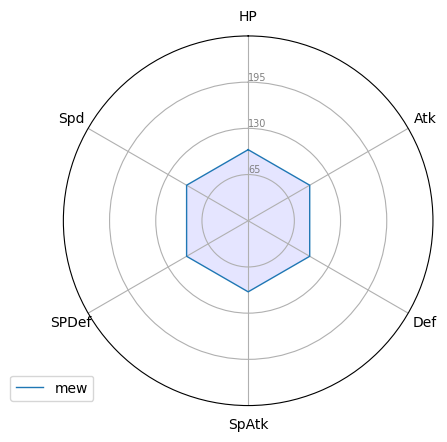

In [35]:
plot_spider(151)

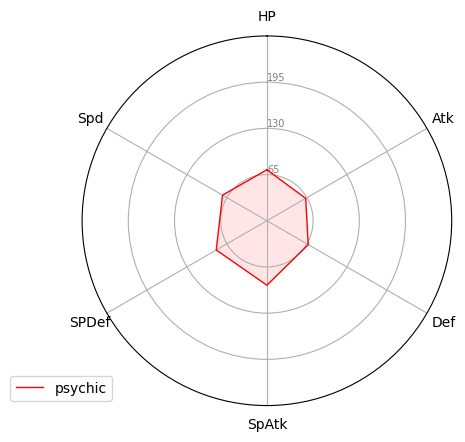

In [36]:
plot_spider("psychic","Type1")

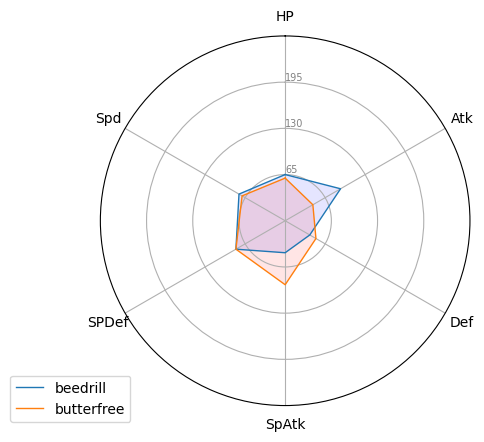

In [37]:
plot_spider(15, 12, comp = True)

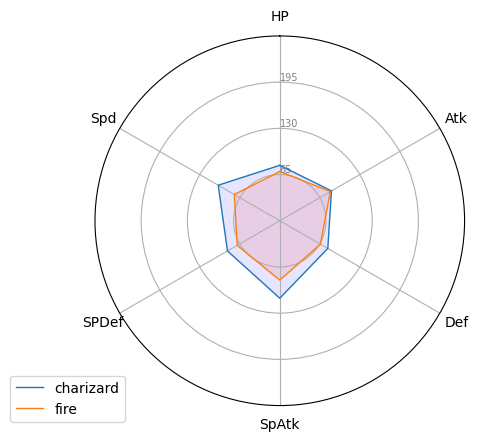

In [38]:
plot_spider(6, "Type1", comp = True)